In [1]:
import numpy as np
import scipy as sp
import seaborn as sns
from itertools import product
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
# import keras.backend as K
# import sys
# import pickle

In [2]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.datasets import mnist

from matplotlib.collections import LineCollection
from matplotlib.font_manager import FontProperties

from numpy.linalg import LinAlgError
from scipy.sparse.csgraph import laplacian
# from spectral_metric.lib import find_samples, compute_expectation_with_monter_carlo 
from spectral_metric.estimator import CumulativeGradientEstimator
from spectral_metric.visualize import make_graph

from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.datasets import mnist
# from keras.applications.imagenet_utils import preprocess_input 
# from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
# from accuracy.model_definition import models

# import os
# os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

In [3]:
# Cargar el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()


"""
Conversión de los valores de pixeles de las imagenes a tipo float32. 
Se divide cada valor de pixel entre 255 para normalizarlos en el rango de 0 a 1.
En las imágenes en escala de grises, los valores de los píxeles están en el rango [0, 255], 
donde 0 representa el color negro y 255 representa el color blanco. Dividir por 255 normaliza 
los valores de los píxeles para que estén en el rango [0, 1], lo que facilita el entrenamiento 
del modelo y puede mejorar la convergencia.
"""

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
# Mostrar las dimensiones del conjunto de datos

print(f"\nDimensiones del conjunto de entrenamiento:, {x_train.shape}, Número de dimensiones: {x_train.ndim}")
# Verificar las dimensiones de x_train
if x_train.ndim == 3:
    print("x_train es una matriz 3D")
else:
    print("x_train no es una matriz 3D")

print(f"\nDimensiones del conjunto de prueba: {x_test.shape}, Número de dimensiones: {x_test.ndim}")
# Verificar las dimensiones de x_test
if x_test.ndim == 3:
    print("x_test es una matriz 3D")
else:
    print("x_test no es una matriz 3D")

print(f"\nDimensiones de las etiquetas de entrenamiento: {y_train.shape}, Número de dimensiones: {y_train.ndim}")
# Verificar las dimensiones de y_train
if y_train.ndim == 1:
    print("y_train es una matriz 1D")
else:
    print("y_train no es una matriz 1D")

print(f"\nDimensiones de las etiquetas de prueba: {y_test.shape}, Número de dimensiones: {y_test.ndim}")
# Verificar las dimensiones de y_test
if y_test.ndim == 1:
    print("y_test es una matriz 1D")
else:
    print("y_test no es una matriz 1D")


Dimensiones del conjunto de entrenamiento:, (60000, 28, 28), Número de dimensiones: 3
x_train es una matriz 3D

Dimensiones del conjunto de prueba: (10000, 28, 28), Número de dimensiones: 3
x_test es una matriz 3D

Dimensiones de las etiquetas de entrenamiento: (60000,), Número de dimensiones: 1
y_train es una matriz 1D

Dimensiones de las etiquetas de prueba: (10000,), Número de dimensiones: 1
y_test es una matriz 1D


Dataset complexity: [0.15274879]
Dataset complexity in percentage: 15.275 %


C:\Users\Cesar\AppData\Local\Temp\ipykernel_10596\3783753316.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Dataset complexity in percentage: {round(float(csg) * 100, 3)} %")
c:\Users\Cesar\Desktop\Proyecto-de-grado-CSG\1 - prueba de CSG\Pruebas en distintos datasets\spectral_metric\visualize.py:48: RuntimeWarning: divide by zero encountered in divide
  similarities = difference.max() / difference * 100
c:\Users\Cesar\Desktop\Proyecto-de-grado-CSG\1 - prueba de CSG\Pruebas en distintos datasets\spectral_metric\visualize.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


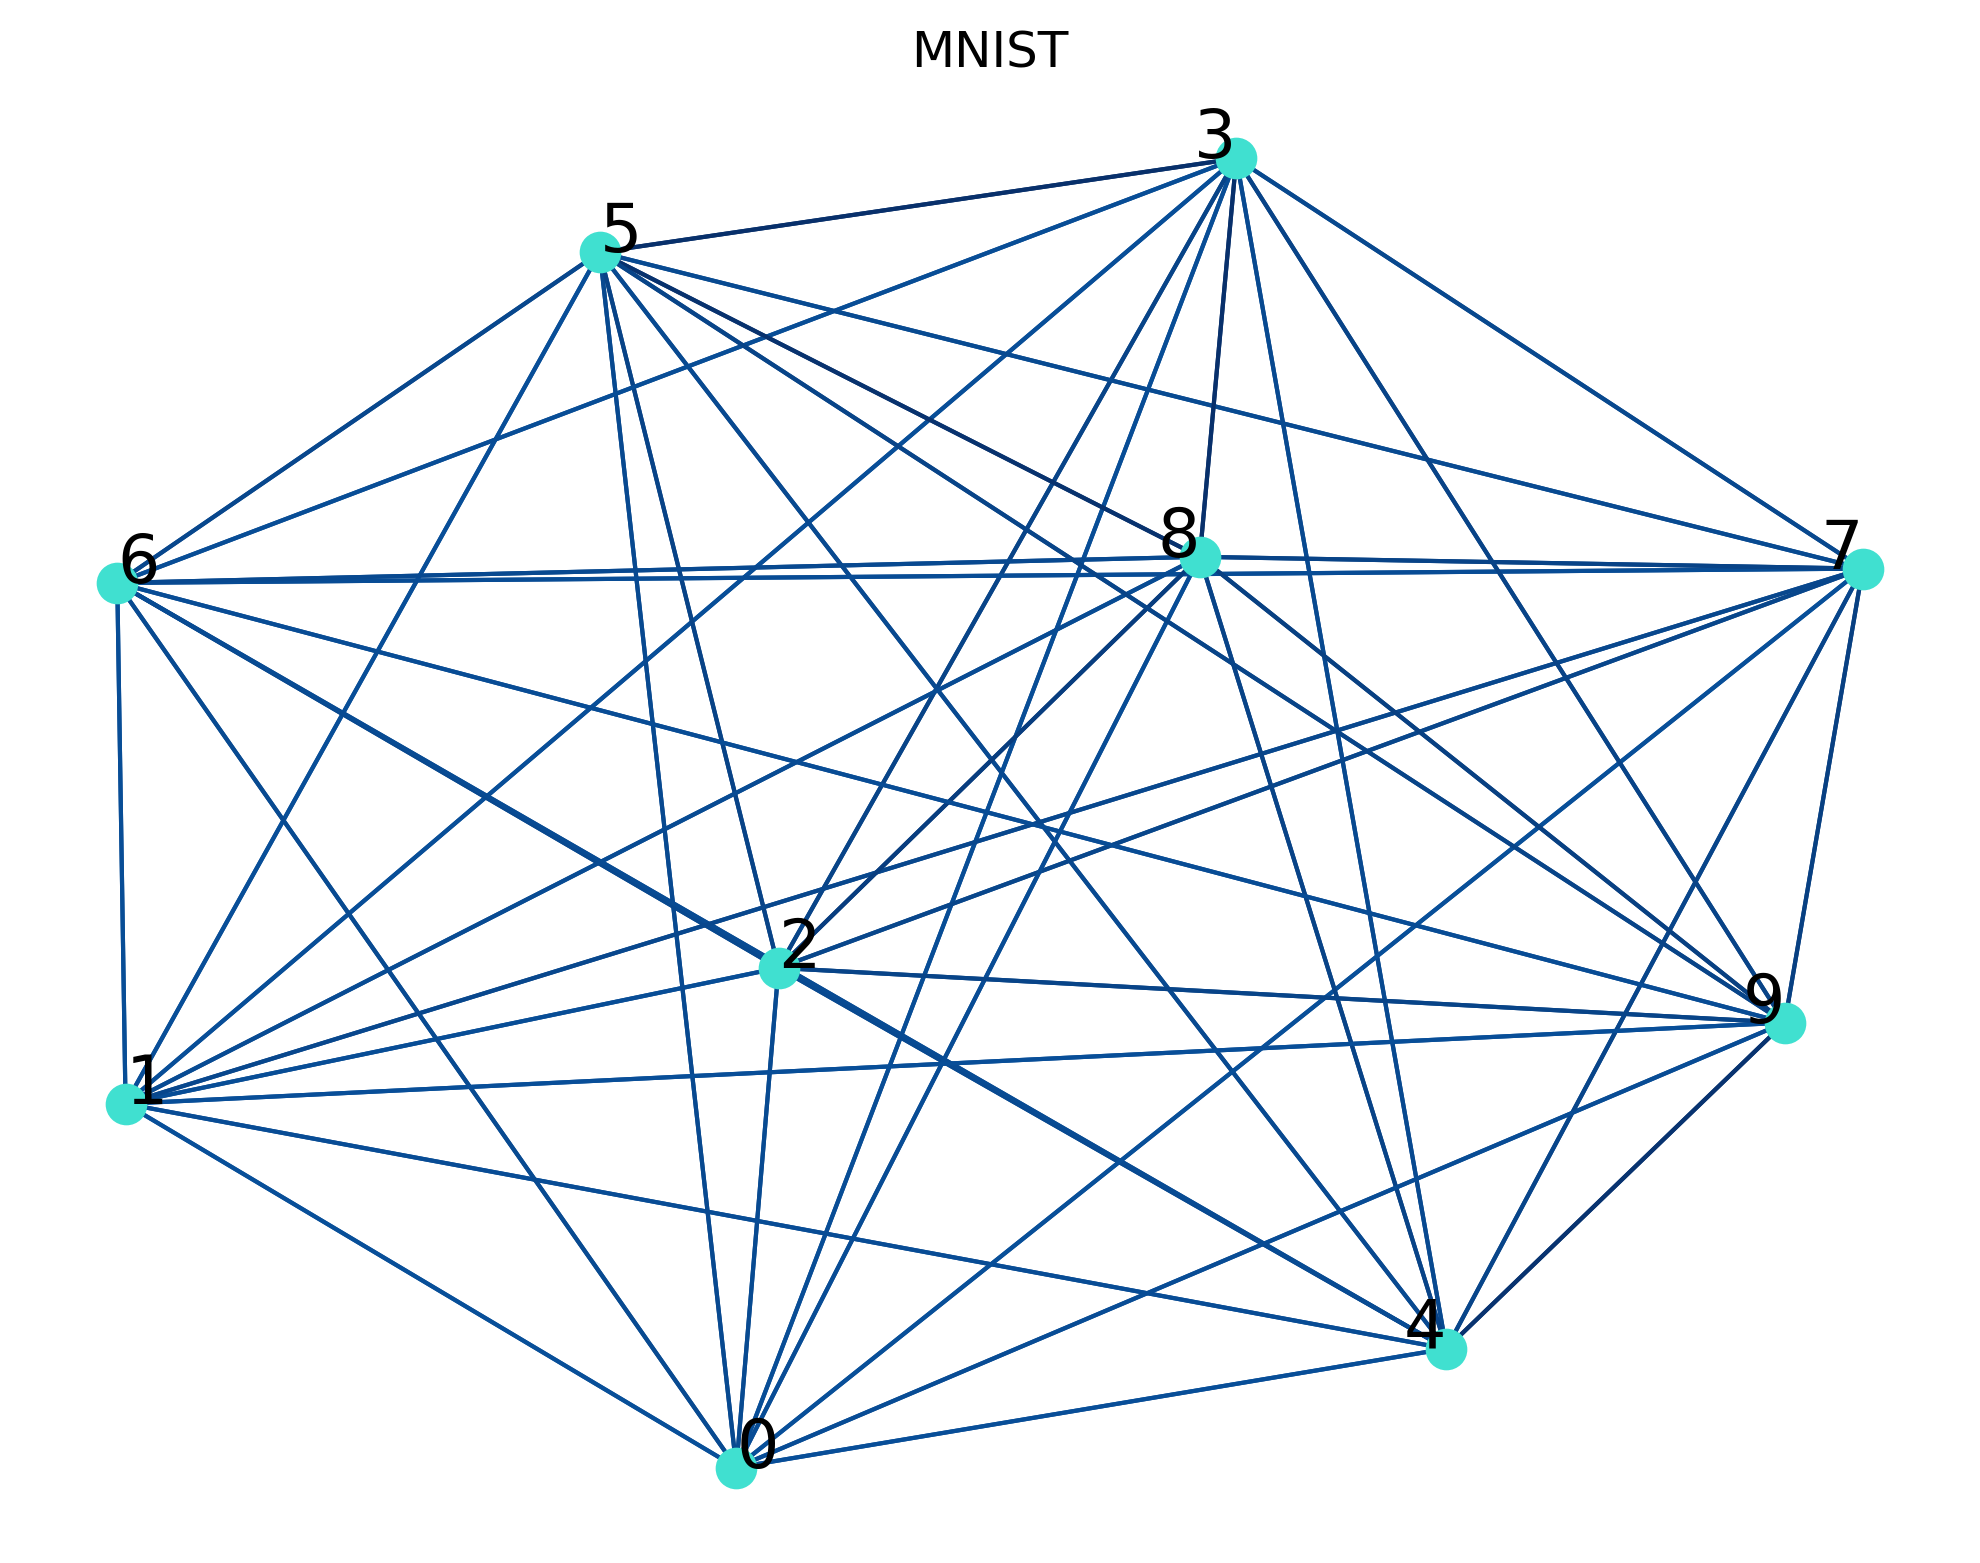

In [5]:
# Apply CSG Metric
    
X = x_test.reshape((x_test.shape[0], -1))
#X = x_test.reshape((x_train.shape[0], x_train.shape[1] * x_train.shape[2]))  # Other way to reshape the vector
Y = y_test
estimator = CumulativeGradientEstimator(M_sample=250, k_nearest=5)
estimator.fit(data=X, target=y_test)

# Obtain the complexity values
csg = estimator.csg     # The actual or real complexity values
estimator.evals, estimator.evecs     # The eigenvalues and vectors

# Complexity
print(f"Dataset complexity: {csg}")
print(f"Dataset complexity in percentage: {round(float(csg) * 100, 3)} %")

# Plot the dataset
make_graph(estimator.difference, title="MNIST", classes=[str(i) for i in range(10)])

In [6]:
print(f"Dataset complexity: {csg}")

Dataset complexity: [0.15274879]


In [7]:
print(f"Dataset complexity in percentage: {round(float(csg) * 100, 3)} %")

Dataset complexity in percentage: 15.275 %


C:\Users\Cesar\AppData\Local\Temp\ipykernel_10596\439354336.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Dataset complexity in percentage: {round(float(csg) * 100, 3)} %")
